# Часть 2. Распределение данных и распределение выборок

In [11]:
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import resample
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [12]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [13]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

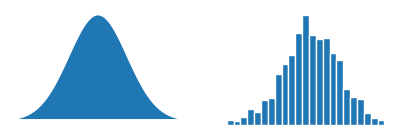

In [14]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

## Выборочное распределение 

In [15]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


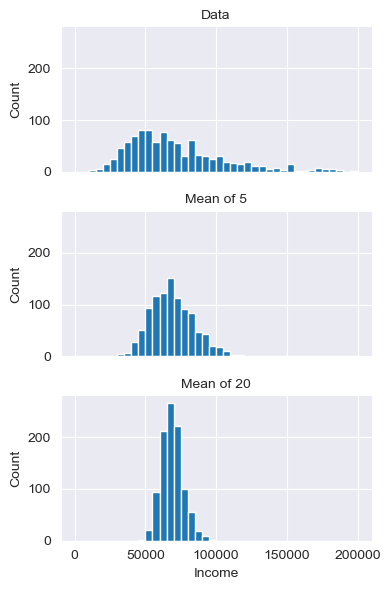

In [16]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [17]:
# Создаем несбалансированные данные
df = pd.DataFrame({'feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]})

# Уменьшаем количество примеров в каждом классе
df_resampled = resample(df)

print(df_resampled)

   feature  label
1        2      0
3        4      0
1        2      0
6        7      1
4        5      0
1        2      0
2        3      0
1        2      0
5        6      1
0        1      0


## Бутстрап

**1. Бутстраповская выборка (bootstrap sample)**
> Выборка, взятая с возвратом из набора наблюдаемых данных. Синоним: бутстрап-выборка.

**2.Повторный отбор (resampling)**
> Процесс многократного взятия выборок из наблюдаемых данных; включает процедуры бутстрапа и перестановки (пермутации). Синонимы: многократный отбор, перевыборка, ресемплинг. 


Алгоритм бутстраповского повторного отбора среднего значения для выборки размера n будет следующим: 
>1.	Извлечь выборочное значение, записать его и вернуть назад. 
>2.	Повторить n раз. 
>3.	Записать среднее для n повторно отобранных значений. 
>4.	Повторить R раз шаги 1–3. 
>5.	Использовать R результатов, чтобы:


<img src="pic/bst.png" width=500 height=500/>

In [18]:
results = []
for nrepeat in range(1000):
    s = resample()
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original median: {loans_income.median()}')
print(f'resample median: {results.median()}')

print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original median: 62000.0
resample median: 62000.0
bias: -81.5844999999972
std. error: 228.69258494354057


## Доверительный интервал

68760.51844
55734.1


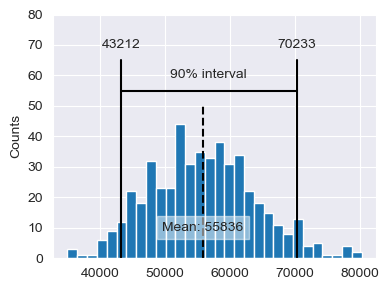

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## Нормальное распределение

**Стандартное нормальное распределение** -- это такое распределение, в котором единицы на оси x выражены в стандартных отклонениях от среднего.
Для того чтобы сравнить данные со стандартным нормальным распределением, нужно вычесть среднее и затем разделить на стандартное отклонение; эта процедура также называется нормализацией или стандартизацией. 
Отметим, что "стандартизация" в данном смысле не свяана со стандартизацией записей базы данных (т. е. приведением к общему форма- ту). Преобразованное значение называется z-оценкой, или стандартной оценкой, а нормальное распределение иногда называют z-распределением. 
- Квантиль-квантильный график используют, чтобы визуально определить, насколько выборка близка к нормальному распределению.

The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

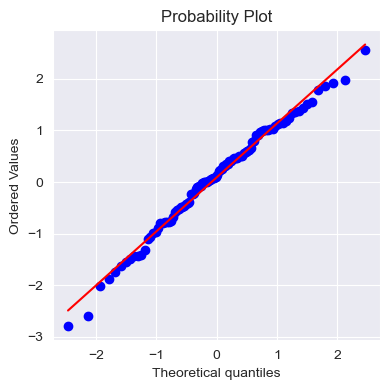

In [20]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

Квантиль-квантильный график выборки, состоящей из 100 значений, извлеченных из нормального распределения

**Конвертирование данных в z-оценки (т. е. стандартизация или нормализация данных) не делает данные нормально распределенными. Эта процедура просто помещает данные на ту же шкалу, что стандартное нормальное распределение, часто в целях сравнения.**

## Длиннохвостные распределения

Ниже показан квантиль-квантильный график ежедневной возвратности акций компании Netflix (NFLX). 

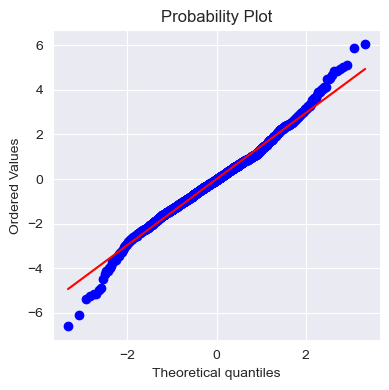

In [21]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

точки расположены намного ниже линии для низких значений и намного выше прямой для высоких значений. Это означает, что мы наблюдаем предельные значения с намного большей вероятностью, чем можно ожидать, если бы данные имели нормальное распределение. 

## Биномиальное распределение

Биномиальное распределение — это частотное распределение числа успехов (x) в заданном числе испытаний (n) с указанной вероятностью (p) успеха в каждом испытании.

>Если вероятность нажатия, которое конвертируется в продажу, составляет 0,02, то какова вероятность наблюдать 2 продажи при 200 нажатиях?

In [22]:
print(stats.binom.pmf(2, n=200, p=0.02))

0.14577265200077438


Часто мы заинтересованы в определении вероятности x или меньшего количества успехов при n испытаниях. Она вернет вероятность наблюдать два или меньшее число успехов в пяти испытаниях, где вероятность успеха для каждого испытания равна 0,02.

In [23]:
print(stats.binom.cdf(2, n=200, p=0.02))

0.23514813577270552


## Пуассон и связанное с ним распределение

Распределение Пуассона говорит нам о распределении событий в расчете на единицу времени или пространства, когда мы выбираем много таких единиц. Оно полезно, когда отвечают на вопросы о массовом обслуживании, к примеру, такой: "Какие мощности нам потребуются, чтобы на 95% быть уверенными в полной обработке интернет-трафика, который прибывает на сервер в любой 5-секундный период?" 

Ключевым параметром в распределении Пуассона является λ (лямбда). Это среднее число событий, которое происходит в указанный интервал времени или про- странства. Дисперсия пуассоновского распределения тоже равна λ . 


Этот фрагмент кода генерирует 100 случайных чисел из распределения Пуассона, где λ = 2 . Например, если среднее число входящих звонков в службу поддержки клиентов равно 2 в минуту, то этот фрагмент кода сымитирует 100 минут, возвращая число вызовов в каждую из этих 100 минут.


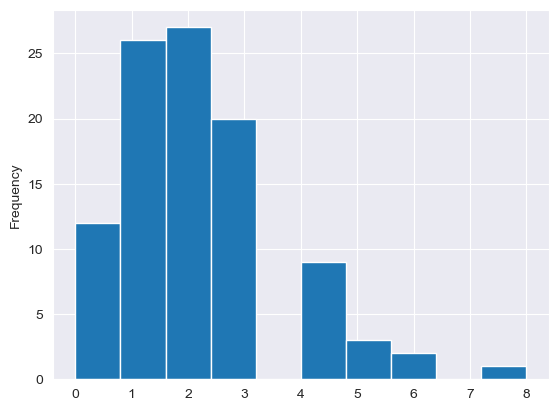

In [24]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Экспоненциальное распределение

Взяв тот же параметр λ , который мы использовали в распределении Пуассона, мы также можем смоделировать распределение времени между событиями: время между посещениями веб-сайта или между прибытиями автомобилей в пункт сбора дорожной пошлины. 

Этот фрагмент кода сгенерирует 100 случайных чисел из экспоненциального распределения, где среднее число событий в расчете на период времени равно 2. Таким образом, его можно использовать для моделирования 100 интервалов в минутах между сервисными вызовами, где средняя интенсивность входящих вызовов равна 0,2 в минуту.

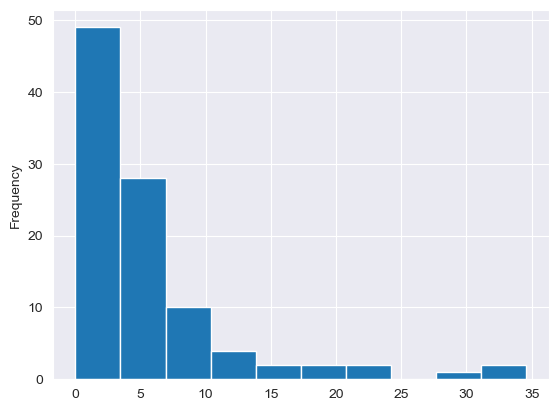

In [25]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

**Ключевое допущение в любом симуляционном исследовании как для пуассоновского, так и для экспоненциального распределений состоит в том, что интенсивность λ остается постоянной в течение рассматриваемого периода.**

## Распределение Вейбулла

Распределение Вейбулла является расширением экспоненциального распределения, в котором допускается изменение интенсивности события в соответствии с параметром формы β. 
> Если β>1, то вероятность события увеличивается во времени, если β<1, то она уменьшается. 

Например, следующий фрагмент кода сгенерирует 100 случайных чисел (времена жизни) из распределения Вейбулла с формой 1,5 и характерным временем жизни 5000:

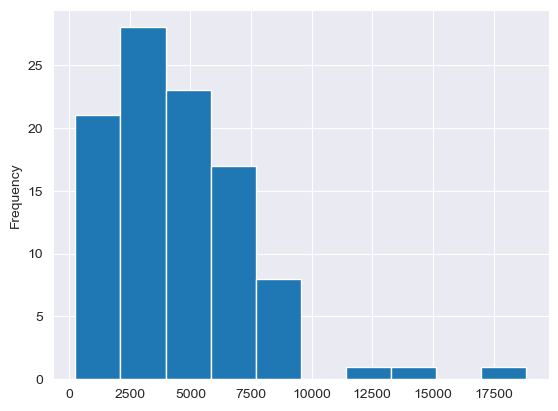

In [26]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()